In [1]:
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

No missing values and data has 33 columns and 15240 rows

## Fraud vs not fraud

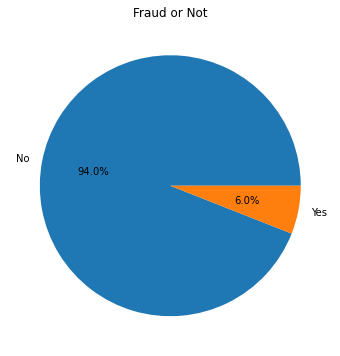

In [4]:
plt.figure(figsize=(8,6))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.1f%%')
plt.title("Fraud or Not")
plt.show()

Only 6% of the dataset shows fraud cases. The data is extremely imbalanced

## Checking the relationship between fraud and other features

In [5]:
# change the yes and no in fraudfound column to numeric
le = LabelEncoder()


In [6]:
df.FraudFound = le.fit_transform(df.FraudFound)
df.FraudFound[:5]

0    0
1    0
2    0
3    0
4    0
Name: FraudFound, dtype: int32

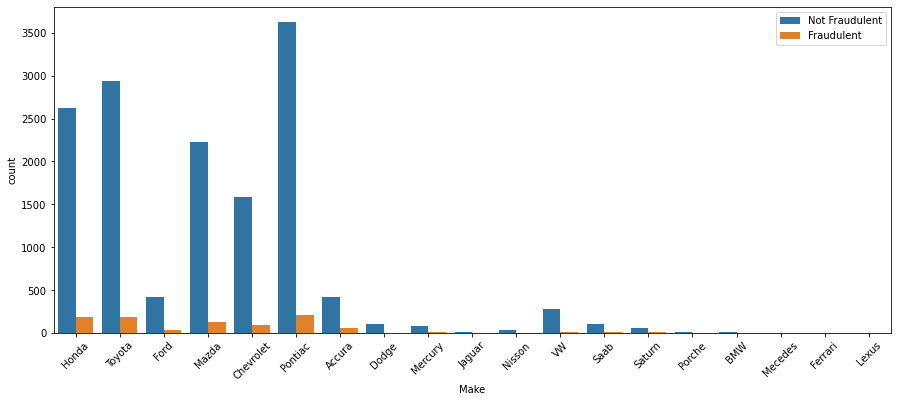

In [7]:
plt.figure(figsize =(15,6))
ax = sns.countplot(x = 'Make', hue = 'FraudFound' , data = df)
#for p in ax.patches:
    #ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xticks(rotation=45)
plt.legend(labels =['Not Fraudulent','Fraudulent'],loc='upper right');

The only relationship that can be seen here is that the more the number of cars the higher the fraudulent claims. Although, Accura with the same number of cars as Ford has more fraudulent claims.Not much data was found for the high end vehicles

### Age of policy holder

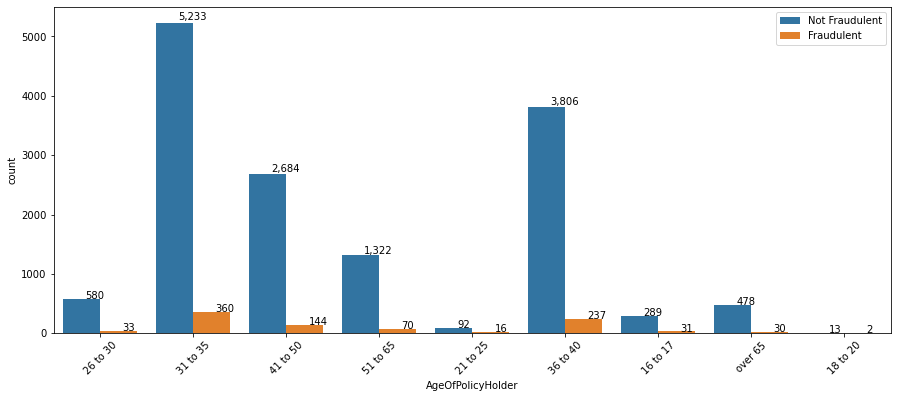

In [8]:
plt.figure(figsize =(15,6))
ax = sns.countplot(x = 'AgeOfPolicyHolder', hue = 'FraudFound' , data = df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xticks(rotation=45)
plt.legend(labels =['Not Fraudulent','Fraudulent'],loc='upper right');

Ages 16-17, 21-25 show they have a high prevalence of fraudulent claims, when you compare it with over 65.Over 65 have 30 fraudulent claims in 478 accidents while for 16-17, out of 289 accidents, 31 claims are false. Same for 21-25 where with a small number of accidents(92), 16 are already false 

### Sex

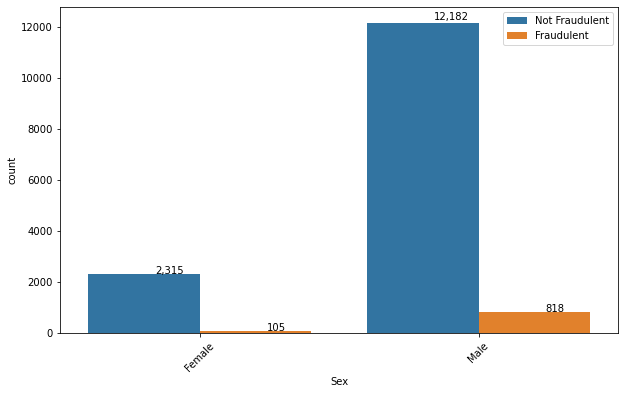

In [9]:
plt.figure(figsize =(10,6))
ax = sns.countplot(x = 'Sex', hue = 'FraudFound' , data = df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xticks(rotation=45)
plt.legend(labels =['Not Fraudulent','Fraudulent'],loc='upper right');

In [10]:
df.groupby('Sex')['FraudFound'].value_counts(normalize=True)

Sex     FraudFound
Female  0             0.956612
        1             0.043388
Male    0             0.937077
        1             0.062923
Name: FraudFound, dtype: float64

Males have more tendency to do fraudulent claims

### Accident Area

In [11]:
df.groupby('AccidentArea')['FraudFound'].value_counts(normalize=True)

AccidentArea  FraudFound
Rural         0             0.916771
              1             0.083229
Urban         0             0.942845
              1             0.057155
Name: FraudFound, dtype: float64

* There are more false claims in rural areas than urban areas

### Cars involved

In [12]:
df.groupby('NumberOfCars')['FraudFound'].value_counts(normalize=True)

NumberOfCars  FraudFound
1 vehicle     0             0.940626
              1             0.059374
2 vehicles    0             0.939351
              1             0.060649
3 to 4        0             0.922043
              1             0.077957
5 to 8        0             0.952381
              1             0.047619
more than 8   0             1.000000
Name: FraudFound, dtype: float64

* More frauds happening when the number of vehicles involved were 3 to 4 and 2

### Marital Status

In [13]:
df.groupby('MaritalStatus')['FraudFound'].value_counts(normalize=True)

MaritalStatus  FraudFound
Divorced       0             0.960526
               1             0.039474
Married        0             0.939859
               1             0.060141
Single         0             0.940649
               1             0.059351
Widow          0             0.914286
               1             0.085714
Name: FraudFound, dtype: float64

* Married and widowed people were more likely to commit car insurance fraud

### heatmap

In [14]:
# columns that are objects
cols = df.select_dtypes('O').columns
cols

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [15]:
# transform them 
df[cols] = df[cols].apply(le.fit_transform)

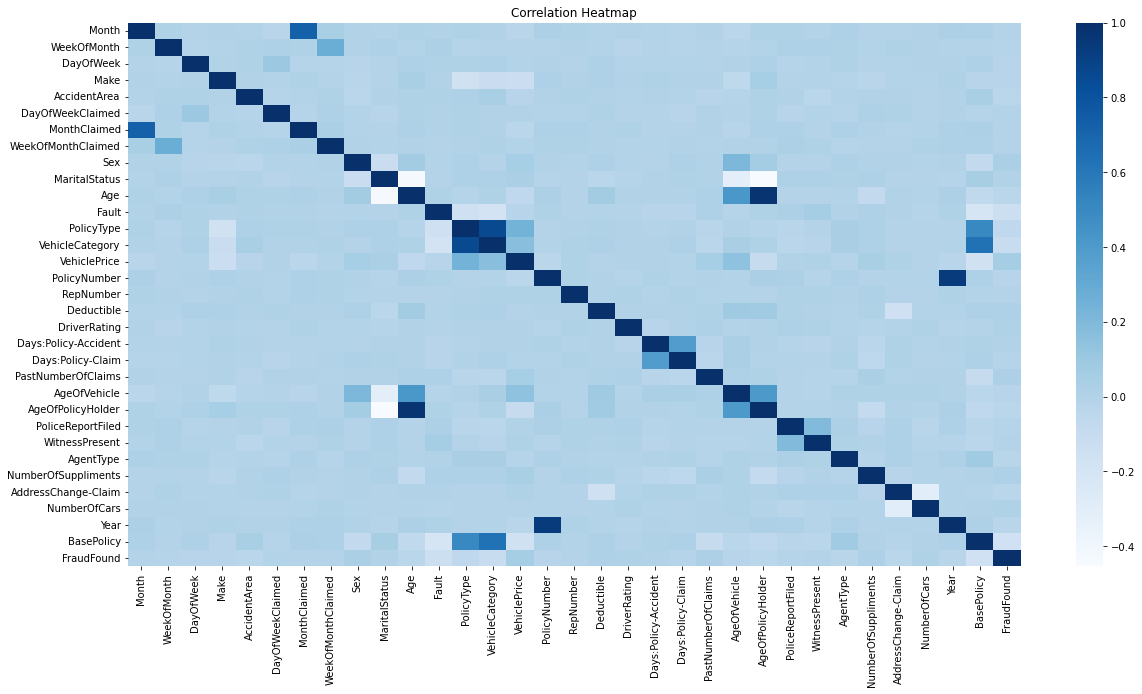

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

* Some features have a very high colleration, so they might be giving us same information.I remove some these features

### modelling- we are looking for high recall

In [17]:
df_new = df.drop(['Year','Age','MonthClaimed'], axis = 1)

In [18]:
# training set and test set
X = df_new.drop('FraudFound', axis = 1)
y = df_new.FraudFound

In [19]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### logistic regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
lr_pred = lr.predict(X_test)

accuracy_lr=accuracy_score(y_test, lr_pred)
print("Model Accuracy:",accuracy_lr)

confusion_matrix(y_test,lr_pred)

Model Accuracy: 0.9377431906614786


array([[3615,    0],
       [ 240,    0]], dtype=int64)

The model accuracy is very high but it is not predicting any positive cases. This could mostly be due to the class imbalance

#### random forest classifier

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

accuracy_rf=accuracy_score(y_test, rf_pred)
print("Model Accuracy:",accuracy_rf)

confusion_matrix(y_test,rf_pred)

Model Accuracy: 0.9380025940337224


array([[3615,    0],
       [ 239,    1]], dtype=int64)

Similar to this model

### With balanced dataset- i will upsample the minority since downsampling majority leaves us with not enough data

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE()

In [25]:
X_train_resampled,y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
#logistic regression
lr1 = LogisticRegression()
lr1.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [27]:
lr1_pred = lr1.predict(X_test)

accuracy_lr1=accuracy_score(y_test, lr1_pred)
print("Model Accuracy:",accuracy_lr1)

#confusion_matrix(y_test,lr1_pred)

Model Accuracy: 0.7486381322957198


<AxesSubplot:>

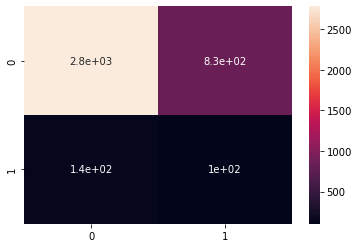

In [28]:
cm = confusion_matrix(y_test,lr1_pred)
sns.heatmap(cm, annot=True)

Although the model can now predict the minority class, its not doing well

In [29]:
# random forest
rf1 = RandomForestClassifier()
rf1.fit(X_train_resampled,y_train_resampled)
rf1_pred = rf1.predict(X_test)

accuracy_rf1=accuracy_score(y_test, rf1_pred)
print("Model Accuracy:",accuracy_rf1)


Model Accuracy: 0.9110246433203631


<AxesSubplot:>

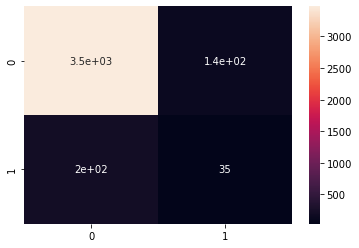

In [30]:
cm = confusion_matrix(y_test,rf1_pred)
sns.heatmap(cm, annot=True)